<a href="https://colab.research.google.com/github/emm-gl/Referenz/blob/master/DevL23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is script attempts to classiy the images in primer/guiding inspection and validation inspection

Start date: 31 05 23

In [83]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import shutil


In [20]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Arbeit/VITRO/L23/Images/230403_104549_0000000003_CAM1_NG.bmp'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
#print(image)

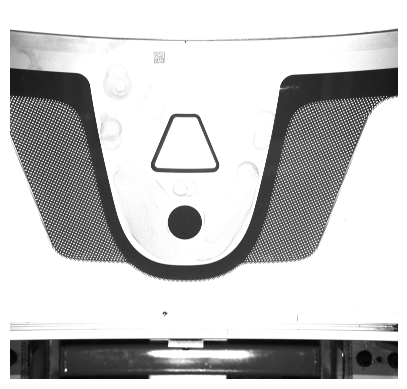

In [38]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


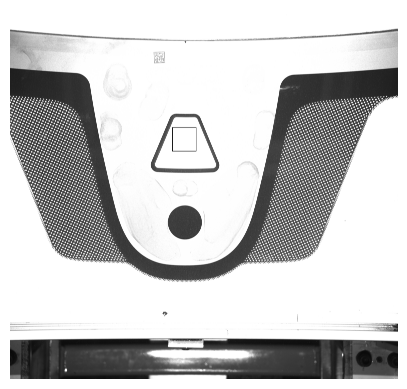

In [52]:
#Show the image:

image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

x, y, width, height = 3430, 2500, 500, 500 
roi = image[y:y+height, x:x+width]
cv2.rectangle(image, (x, y), (x+width, y+height), (0, 0, 0), 10)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


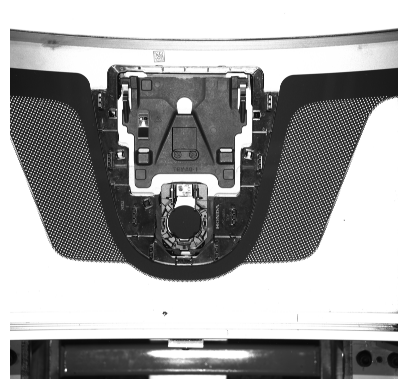

10968.0


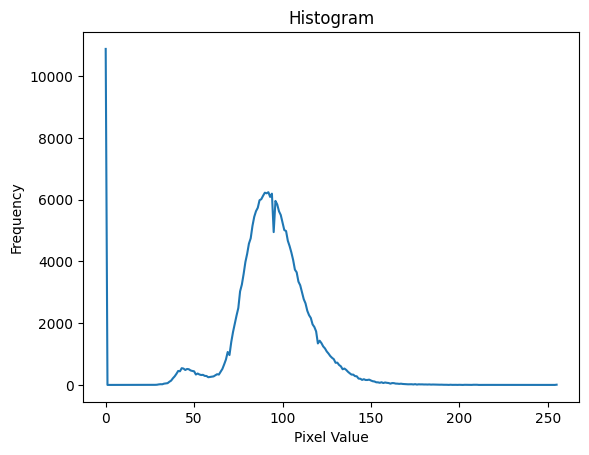

In [59]:
#Show the image:
file_path = '/content/drive/MyDrive/Arbeit/VITRO/L23/Images/230403_105443_0000000010_CAM1_NG.bmp'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

x, y, width, height = 3430, 2500, 500, 500 
roi = image[y:y+height, x:x+width]
cv2.rectangle(image, (x, y), (x+width, y+height), (0, 0, 0), 10)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


hist = cv2.calcHist([roi], [0], None, [256], [0, 256])
count = np.sum(hist[128:])
print(count)

# Plot the histogram
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

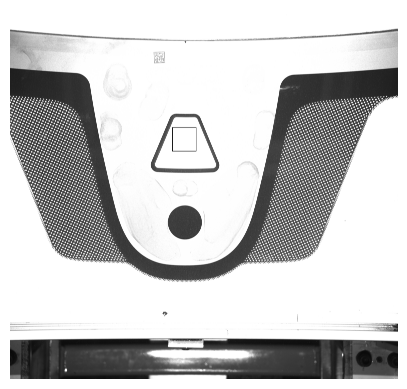

239121.0


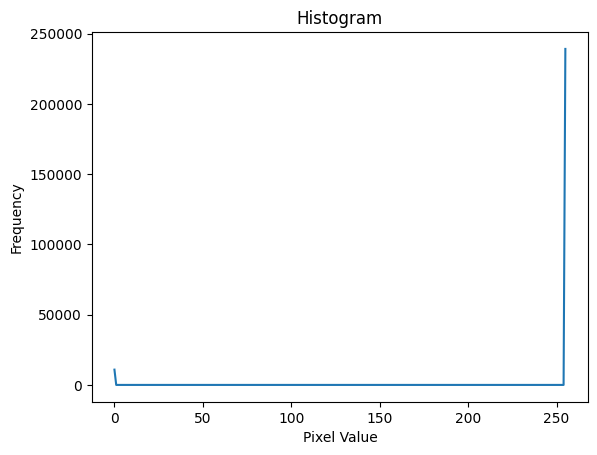

In [62]:
#Show the image:
file_path = '/content/drive/MyDrive/Arbeit/VITRO/L23/Images/230403_104549_0000000003_CAM1_NG.bmp'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

x, y, width, height = 3430, 2500, 500, 500 
roi = image[y:y+height, x:x+width]
cv2.rectangle(image, (x, y), (x+width, y+height), (0, 0, 0), 10)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


hist = cv2.calcHist([roi], [0], None, [256], [0, 256])
count = np.sum(hist[128:])
print(count)

# Plot the histogram
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
root_dirplt.show()

In [84]:
root_dir = '/content/drive/MyDrive/Arbeit/VITRO/L23/Images/'
GuidingFolder = '/content/drive/MyDrive/Arbeit/VITRO/L23/Images/Guiding'
BondingFolder = '/content/drive/MyDrive/Arbeit/VITRO/L23/Images/Bonding'
x, y, width, height = 3430, 2500, 500, 500 
threshold = 128
minValue = 150000


#Create the folder:
if not os.path.exists(GuidingFolder):
    os.makedirs(GuidingFolder)
    print(f"The folder '{GuidingFolder}' has been created.")
else:
    print(f"The folder '{GuidingFolder}' already exists.")
if not os.path.exists(BondingFolder):
    os.makedirs(BondingFolder)
    print(f"The folder '{BondingFolder}' has been created.")
else:
    print(f"The folder '{BondingFolder}' already exists.")


# Get a list of all files in the source directory
files = os.listdir(root_dir)

for file in files:
    if file.endswith('.bmp'):
        # Create the full paths for the source and destination files
        image_path = os.path.join(root_dir, file)

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        roi = image[y:y+height, x:x+width]
        hist = cv2.calcHist([roi], [0], None, [256], [0, 256])
        count = np.sum(hist[threshold:])
        
        if count > minValue:
          print(image_path + ' is a primer Image')
           # Move the file to the destination directory
          shutil.move(image_path, GuidingFolder)
          print(f"Moved {file} to {GuidingFolder}")
        else:
          shutil.move(image_path, BondingFolder)
          print(f"Moved {file} to {BondingFolder}")


The folder '/content/drive/MyDrive/Arbeit/VITRO/L23/Images/Guiding' already exists.
The folder '/content/drive/MyDrive/Arbeit/VITRO/L23/Images/Bonding' already exists.
/content/drive/MyDrive/Arbeit/VITRO/L23/Images/230403_104549_0000000003_CAM1_NG.bmp is a primer Image
Moved 230403_104549_0000000003_CAM1_NG.bmp to /content/drive/MyDrive/Arbeit/VITRO/L23/Images/Guiding
/content/drive/MyDrive/Arbeit/VITRO/L23/Images/230403_104608_0000000006_CAM1_OK.bmp is a primer Image
Moved 230403_104608_0000000006_CAM1_OK.bmp to /content/drive/MyDrive/Arbeit/VITRO/L23/Images/Guiding
/content/drive/MyDrive/Arbeit/VITRO/L23/Images/230403_105344_0000000009_CAM1_OK.bmp is a primer Image
Moved 230403_105344_0000000009_CAM1_OK.bmp to /content/drive/MyDrive/Arbeit/VITRO/L23/Images/Guiding
Moved 230403_105443_0000000010_CAM1_NG.bmp to /content/drive/MyDrive/Arbeit/VITRO/L23/Images/Bonding
/content/drive/MyDrive/Arbeit/VITRO/L23/Images/230403_105502_0000000015_CAM1_OK.bmp is a primer Image
Moved 230403_105502_